# Inaugural Project

In this project, we will analyze a simple exchange economy with two consumers $A$ and $B$, and two goods, $x_1$ and $x_2$. Each consumer has initial endowments of these goods, ${\omega}^{A}_{1}\ge0$ and ${\omega}^{A}_{2}\ge0$, which they can trade in the market. 

In [1]:
#We start by importing our necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#We use the following code for better visualization
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

#We use the autoreload extension to automatically reload modules when code is run
%load_ext autoreload
%autoreload 2

Definition of the parameters

In [2]:
alpha = 1/3
beta = 2/3
omega_A = np.array([0.8, 0.3])
omega_B = 1 - omega_A
p2 = 1
N=75

Defintion of the utility functions for both agents 

In [3]:
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta * x2**(1-beta)

Defintion of the demand functions for both agents 

In [4]:
def demand_A(p1, omega_A=omega_A):
    x1_star = alpha * (omega_A[0]*p1 + omega_A[1]*p2) / p1
    x2_star = (1-alpha) * (omega_A[0]*p1 + omega_A[1]*p2) / p2
    return np.array([x1_star, x2_star])

def demand_B(p1, omega_B=omega_B):
    x1_star = beta * (omega_B[0]*p1 + omega_B[1]*p2) / p1
    x2_star = (1-beta) * (omega_B[0]*p1 + omega_B[1]*p2) / p2
    return np.array([x1_star, x2_star])

# Question 1

In question 1, we will illustrate the set of Pareto optimal allocations for two consumers, $A$ and $B$, within an Edgeworth box framework, which depicts the distribution of two goods in an exchange economy.

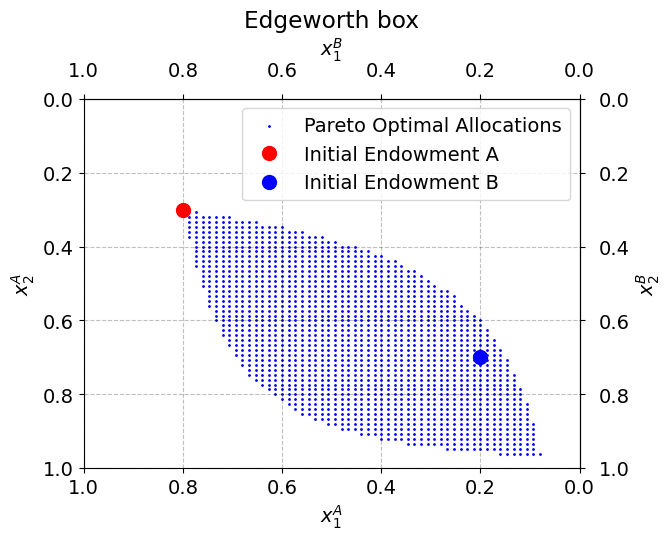

In [5]:
#We have aldready defined our parameters and our utility functions

#We now calculate the initial utilities for both agents
initial_U_A = u_A(omega_A[0], omega_A[1])
initial_U_B = u_B(omega_B[0], omega_B[1])

#We initialize lists to hold Pareto optimal allocations
pareto_x1_A = []
pareto_x2_A = []
pareto_x1_B = []
pareto_x2_B = []

#Then we loop over all possible combinations of good allocations to A 
for x1_A in np.linspace(0, 1, N+1):
    for x2_A in np.linspace(0, 1, N+1):
        #And calculates the remaining goods for B
        x1_B = 1 - x1_A
        x2_B = 1 - x2_A

        #We check if this allocation is Pareto optimal
        if u_A(x1_A, x2_A) >= initial_U_A and u_B(x1_B, x2_B) >= initial_U_B:
            pareto_x1_A.append(x1_A)
            pareto_x2_A.append(x2_A)
            pareto_x1_B.append(x1_B)
            pareto_x2_B.append(x2_B)

#We will now plot the Edgeworth Box
fig, ax = plt.subplots()

#We set the primary axes for consumer A
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

#We then plot the Pareto optimal allocations
ax.scatter(pareto_x1_A, pareto_x2_A, c='blue', label='Pareto Optimal Allocations', s=1)

#We highlight initial endowments for A
ax.plot(omega_A[0], omega_A[1], 'ro', markersize=10, label='Initial Endowment A')

#And name the primary axes with labels
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth box')

#We invert the axes
ax.invert_yaxis()
ax.invert_xaxis()

#We create secondary axes for consumer B
ax_sec = ax.secondary_xaxis('top')
ax_sec.set_xlabel('$x_1^B$')
ax_sec.set_xlim(1, 0)
ax_sec.tick_params(axis='x', pad=10)

ax_sec_y = ax.secondary_yaxis('right')
ax_sec_y.set_ylabel('$x_2^B$')
ax_sec_y.set_ylim(1, 0)
ax_sec_y.tick_params(axis='y', pad=10)

#We highlight initial endowments for B 
ax.plot(1 - omega_A[0], 1 - omega_A[1], 'bo', markersize=10, label='Initial Endowment B')

#We then add gridlines for better visual reference
ax.grid(True)

#We add a legend
ax.legend()

#And lastly we show the plot
plt.show()

The Edgeworth box plot visually demonstrates the concept of Pareto efficiency in an exchange economy. The blue dots represent the Pareto optimal allocations. The red dot marks the initial endowment of consumer $A$, and the blue dot marks the initial endowment of consumer $B$. From this, we can see the possible allocations that are beneficial to both consumers compared to their starting points.

# Question 2

In question 2, we will calculate the error in the market clearing condition for a range of prices $\ p_1$  within a given set $\mathcal{P}_1$. 


[ 0.53333333  0.47594937  0.42409639  0.37701149  0.33406593  0.29473684
  0.25858586  0.22524272  0.19439252  0.16576577  0.13913043  0.11428571
  0.09105691  0.06929134  0.04885496  0.02962963  0.01151079 -0.00559441
 -0.02176871 -0.03708609 -0.0516129  -0.06540881 -0.07852761 -0.09101796
 -0.10292398 -0.11428571 -0.12513966 -0.13551913 -0.14545455 -0.15497382
 -0.16410256 -0.17286432 -0.18128079 -0.18937198 -0.1971564  -0.20465116
 -0.21187215 -0.21883408 -0.22555066 -0.23203463 -0.23829787 -0.24435146
 -0.25020576 -0.25587045 -0.26135458 -0.26666667 -0.27181467 -0.27680608
 -0.28164794 -0.28634686 -0.29090909 -0.2953405  -0.29964664 -0.30383275
 -0.30790378 -0.31186441 -0.31571906 -0.31947195 -0.32312704 -0.3266881
 -0.33015873 -0.33354232 -0.33684211 -0.34006116 -0.34320242 -0.34626866
 -0.34926254 -0.35218659 -0.35504323 -0.35783476 -0.36056338 -0.3632312
 -0.36584022 -0.36839237 -0.37088949 -0.37333333]
[-0.26666667 -0.25066667 -0.23466667 -0.21866667 -0.20266667 -0.18666667
 -0

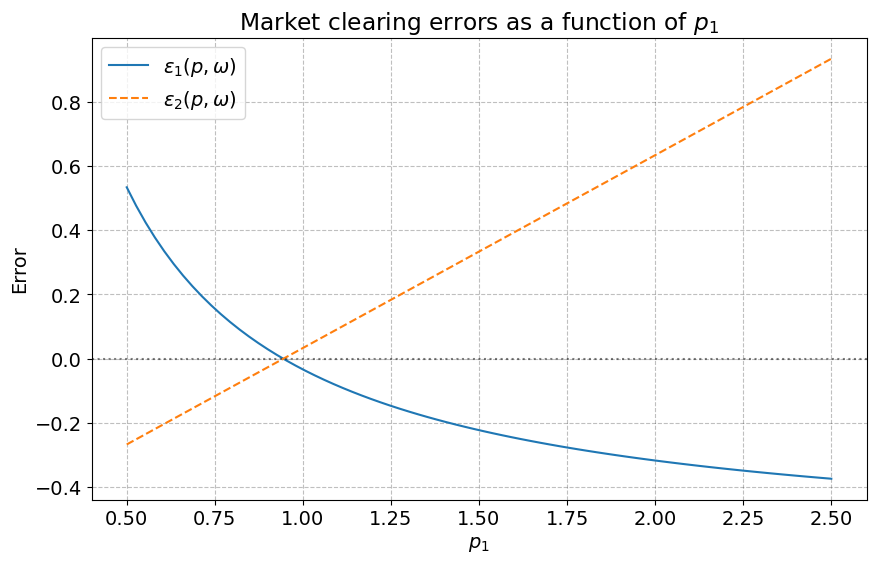

In [6]:
#We initialize the set of prices P1
P1 = np.linspace(0.5, 2.5, int((2.5 - 0.5) / (2 / N)) + 1)

#We now initialize lists to store the market clearing errors for both goods
errors_good1 = np.zeros(len(P1))
errors_good2 = np.zeros(len(P1))

#We make a loop over each price in P1
for i, p1 in enumerate(P1):
    #And calculate demands for both consumers at the given price p1
    demand_for_A = demand_A(p1)
    demand_for_B = demand_B(p1)
    
    #We compute the market clearing error for good 1 and for good 2
    errors_good1[i] = demand_for_A[0] + demand_for_B[0] - 1
    errors_good2[i] = demand_for_A[1] + demand_for_B[1] - 1

#We print the errors
print(errors_good1)
print(errors_good2)

#Lastly we plot the errors
plt.figure(figsize=(10, 6))

plt.plot(P1, errors_good1, label='$\\epsilon_1(p, \\omega)$')
plt.plot(P1, errors_good2, label='$\\epsilon_2(p, \\omega)$', linestyle='--')

plt.axhline(0, color='k', linestyle=':', alpha=0.5)
plt.title('Market clearing errors as a function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

The calculated errors provide valuable insights into the functioning of the market at different prices. The intersection between the two lines shows the prices at which the markets for goods 1 and 2 clear, respectively. Based on the above results, we can thereby identify the prices that minimize market clearing errors and promote efficient resource allocation in the exchange economy.

# Question 3

In question 3 we will find the market clearing price.

In [7]:
#We import and use fsolve to find the roots of our function
from scipy.optimize import fsolve

#We will first define the function to calculate the excess demand for good 1
def excess_demand_good1(p1, omega_A, omega_B, alpha, beta):
    #We calculate demand for A and B using the demand functions
    x1_star_A, x2_star_A = demand_A(p1, omega_A)
    x1_star_B, x2_star_B = demand_B(p1, omega_B)
    
    #We then calculate the excess demand for good 1
    excess_demand = (x1_star_A + x1_star_B) - (omega_A[0] + omega_B[0])
    
    #We return the excess demand
    return excess_demand

#We set an initial guess for the price of good 1
initial_guess_p1 = 1.0

#And then we solve for the market clearing price
market_clearing_price = fsolve(excess_demand_good1, initial_guess_p1, args=(omega_A, omega_B, alpha, beta))

#We print the market clearing price for good 1
print(f"The market clearing price for good 1 is approximately: {market_clearing_price[0]}.")


The market clearing price for good 1 is approximately: 0.9444444444444446.


From this, we see that the price at which the demand from both consumer $A$ and consumer $B$ balances with the supply of good 1 is $0.944.$

# Question 4a

In question 4a we will find the allocation if only prices in  $\mathcal{P}_1$ can be chosen. 

In [8]:
#First we initialize the variables to store the maximum utility and corresponding price
max_utility = -np.inf
optimal_price = None

#We will now find the one that gives A the highest utility
for p1 in P1:
    #We compute the demand for A and B at the given price
    x1_star_A, x2_star_A = demand_A(p1)
    x1_star_B, x2_star_B = demand_B(p1)
    
    #We compute the utility for A
    A_utility = u_A(x1_star_A, x2_star_A)
    
    #And then we check if this utility is higher than what we have found so far
    if A_utility > max_utility:
        max_utility = A_utility
        optimal_price = p1

#We print the optimal price and the utility achieved at this price
print(f"Optimal price for good 1 is {optimal_price} with utility {max_utility}")

#We compute the optimal allocation for A and B at the optimal price
x1_star_A, x2_star_A = demand_A(optimal_price)
x1_star_B, x2_star_B = demand_B(optimal_price)

#We print the optimal allocation for consumer A and B
print(f"Consumer A's optimal allocation: x1 = {x1_star_A}, x2 = {x2_star_A}")
print(f"Consumer B's optimal allocation: x1 = {x1_star_B}, x2 = {x2_star_B}")


Optimal price for good 1 is 2.5 with utility 0.8966987730519458
Consumer A's optimal allocation: x1 = 0.30666666666666664, x2 = 1.5333333333333334
Consumer B's optimal allocation: x1 = 0.31999999999999995, x2 = 0.39999999999999997


We find that the optimal price for good 1 is $2.5$. At this price, consumer $A$'s utility reaches its maximum value of approximately $0.897$.

At the optimal price of $2.5$, consumer $A$'s optimal allocation of goods is approximately $0.307$ units of good 1 and $1.533$ units of good 2. This allocation represents the most preferred combination of good 1 and good 2 that consumer $A$ can afford given their budget and the prices of the goods.

Consumer $B$, on the other hand, ends up with an allocation of approximately $0.32$ units of good 1 and $0.4$ units of good 2. This indicates that at the optimal price, the total consumption of both goods by consumers $A$ and $B$ matches the total supply available in the economy.

# Question 4b

In question 4b, we will find the allocation if any positive price can be chosen. 

In [9]:
#We import and use minimize 
from scipy.optimize import minimize

#We define negative utility function for consumer A and add a penalty for market clearing
def negative_utility_A(p1, omega_A, omega_B):
    x1_star_A, x2_star_A = demand_A(p1, omega_A)
    x1_star_B, x2_star_B = demand_B(p1, omega_B)
    total_demand_x1 = x1_star_A + x1_star_B
    total_demand_x2 = x2_star_A + x2_star_B
    penalty = 1000 * (max(0, total_demand_x1 - 1)**2 + max(0, total_demand_x2 - 1)**2) 
    return -u_A(x1_star_A, x2_star_A) + penalty

#We choose an initial guess value for the price p1
initial_guess = 0.5

#We use the 'minimize' function to find the price that maximizes consumer A's utility
result = minimize(negative_utility_A, initial_guess, args=(omega_A, omega_B), method='SLSQP', options={'disp': True})

#Then we check whether the optimization was successful and then print the result
if result.success:
    optimal_price = result.x[0]
    print(f"Optimal price for good 1 is {optimal_price}.")
else:
    print("Optimization failed.")

#We compute the optimal allocation for A and B at the optimal price
x1_star_A, x2_star_A = demand_A(optimal_price)
x1_star_B, x2_star_B = demand_B(optimal_price)

#And lastly we print the optimal allocation
print(f"Consumer A's optimal allocation: x1 = {x1_star_A}, x2 = {x2_star_A}")
print(f"Consumer B's optimal allocation: x1 = {x1_star_B}, x2 = {x2_star_B}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.5693104897781444
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5
Optimal price for good 1 is 0.9447646691692914.
Consumer A's optimal allocation: x1 = 0.3725131311496448, x2 = 0.7038744902236221
Consumer B's optimal allocation: x1 = 0.6272835009205646, x2 = 0.2963176446112861


We find that the optimal price for good 1 is $0.944$. At this price, consumer $A$'s utility reaches its maximum value of approximately $0.569$.

At the optimal price of $0.944$, consumer $A$'s optimal allocation of goods is approximately $0.372$ units of good 1 and $0.704$ units of good 2. This allocation represents the most preferred combination of good 1 and good 2 that consumer $A$ can afford given their budget and the prices of the goods.

Consumer $B$ ends up with an allocation of approximately $0.628$ units of good 1 and $0.296$ units of good 2. These allocations ensure that the total consumption of both goods by consumers A and B matches the total supply available in the economy, thereby fulfilling the market-clearing conditions.

# Question 5a

In question 5a, we will find the allocation that maximizes consumer $A$'s utility within the constraints of set $C$.

In [10]:
#We define the intial utilities for both consumers
initial_U_A = u_A(omega_A[0], omega_A[1])
initial_U_B = u_B(omega_B[0], omega_B[1])

#We initialize variables to store the maximum utility and corresponding allocation 
max_utility = -np.inf
optimal_allocation = None

#We will find the one Pareto optimal allocation that maximizes A's utility
for x1_A, x2_A in zip(pareto_x1_A, pareto_x2_A):
    #We compute consumer B's allocation
    x1_B = 1 - x1_A
    x2_B = 1 - x2_A
    
    #Then we check if the allocation leaves both consumers no worse off
    if u_A(x1_A, x2_A) >= initial_U_A and u_B(x1_B, x2_B) >= initial_U_B:
        A_utility = u_A(x1_A, x2_A)
        
        #We check if this utility is higher than what we have found so far
        if A_utility > max_utility:
            max_utility = A_utility
            optimal_allocation = (x1_A, x2_A)

#Lastly we print the optimal allocation and the utility achieved at this allocation
if optimal_allocation is not None:
    optimal_x1_A, optimal_x2_A = optimal_allocation
    print(f"Optimal allocation for A: x1 = {optimal_x1_A}, x2 = {optimal_x2_A}")
    print(f"Maximized utility for A: {max_utility}")
else:
    print("No allocation found that satisfies the constraints.")

Optimal allocation for A: x1 = 0.56, x2 = 0.8533333333333334
Maximized utility for A: 0.7415523509091093


We find that the optimal allocation for consumer $A$ is $x_1 =0.56$ and $x_2 =0.853$​. At this allocation, consumer $A$'s utility reaches its maximum value of approximately $0.742$. This allocation ensures that both consumers are at least as well off as they were with their initial endowments, thereby fulfilling the constraints of set $C$.

# Question 5b

In question 5b, we will identify the allocation by maximizing consumer $A$'s utility without any additional restrictions on the choice set.

In [11]:
#We define the objective function for consumer A
def objective(x):
    return -u_A(x[0], x[1])  

#We define bounds for the optimization
bounds = [(0, 1), (0, 1)]

#We will now update the constraints to focus on consumer B not being worse off
constraints = {
    'type': 'ineq',
    'fun': lambda x: u_B(1 - x[0], 1 - x[1]) - initial_U_B  
}

#We will make a list of initial guesses to try
initial_guesses = [
    [0.5, 0.5],
    [0.7, 0.8],
    [0.2, 0.9],
    [0.6, 0.6],
    [0.4, 0.7]
]

best_result = None
best_utility = -np.inf

#We perform the optimization with different initial guesses 
for initial_guess in initial_guesses:
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    if result.success:
        optimal_x1, optimal_x2 = result.x
        A_utility = u_A(optimal_x1, optimal_x2)
        
        if A_utility > best_utility:
            best_utility = A_utility
            best_result = result

#And then we print the optimal allocation and the utility achieved at this allocation
if best_result is not None:
    optimal_x1, optimal_x2 = best_result.x
    print(f"Optimal allocation for A: x1 = {optimal_x1:.4f}, x2 = {optimal_x2:.4f}")
    print(f"Maximized utility for A: {u_A(optimal_x1, optimal_x2):.4f}")
else:
    print("Optimization was unsuccessful. Try different initial guesses or methods.")


Optimal allocation for A: x1 = 0.5757, x2 = 0.8445
Maximized utility for A: 0.7432


We find that the optimal allocation for consumer $A$ is $x_1 = 0.576$ and $x_2 = 0.845$. At this allocation, consumer $A$'s utility reaches its maximum value of approximately $0.7432$.

This result indicates that, by trying different initial guesses for the optimization, we were able to find an allocation that maximizes consumer $A$'s utility while ensuring that consumer $B$ is not worse off than with their initial endowment. The constraints were set to guarantee that consumer $B$'s utility remains at least as high as their initial utility. 

# Question 6a

In question 6a, we aim to determine the optimal allocation of resources. 

In [12]:
#We define the objective function for total utility 
def total_utility_negative(x):
    x1_A, x2_A = x
    x1_B, x2_B = 1 - x1_A, 1 - x2_A
    return -(u_A(x1_A, x2_A) + u_B(x1_B, x2_B))  

#We perform the optimization using the 'minimize' function, which attempts to find the lowest value of the 'total_utility_negative' function.
result = minimize(total_utility_negative, initial_guess, bounds=bounds)

#We will now display the results: the optimal allocations for consumers A and B
if result.success:
    optimal_x1, optimal_x2 = result.x
    optimal_x1_B, optimal_x2_B = 1 - optimal_x1, 1 - optimal_x2
    print(f"Optimal allocation for A: x1 = {optimal_x1:.4f}, x2 = {optimal_x2:.4f}")
    print(f"Optimal allocation for B: x1 = {optimal_x1_B:.4f}, x2 = {optimal_x2_B:.4f}")
    print(f"Maximized aggregate utility: {-total_utility_negative([optimal_x1, optimal_x2]):.4f}")
else:
    print("Optimization was unsuccessful. Try different initial guesses or methods.")

Optimal allocation for A: x1 = 0.3333, x2 = 0.6667
Optimal allocation for B: x1 = 0.6667, x2 = 0.3333
Maximized aggregate utility: 1.0583


We find that the optimal allocation for consumer $A$ is $x_1 =0.333$ and $x_2 =0.667$. For consumer $B$, the optimal allocation is $x_1 =0.667$ and $x_2 =0.333$. At these allocations, the maximized aggregate utility for both consumers is approximately $1.058$. 

# Question 6b

In question 6b, we will visualize and analyze the allocation obtained, comparing it with the outcomes from questions 3 to 5 to understand the differences and implications of each scenario.

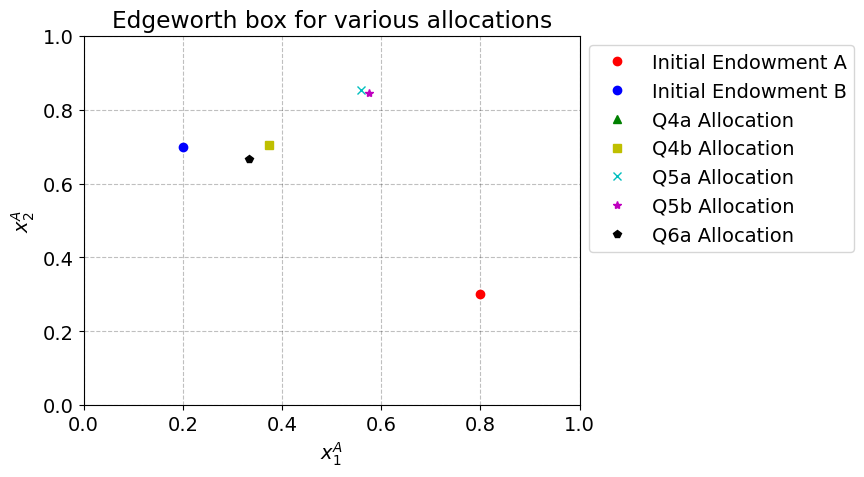

In [13]:
#We write the optimal allocations from previous questions
optimal_allocation_q4a = [0.307, 1.533]
optimal_allocation_q4b = [0.373, 0.704]
optimal_allocation_q5a = [0.56, 0.853]
optimal_allocation_q5b = [0.5757, 0.845]
optimal_allocation_q6a = [0.333, 0.667]

#We set up the initial endowments
omega_A_initial = [0.8, 0.3]
omega_B_initial = [1 - omega_A_initial[0], 1 - omega_A_initial[1]]

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$x_1^A$')
ax.set_ylabel('$x_2^A$')
ax.set_title('Edgeworth box for various allocations')

#We plot the initial endowments
ax.plot(omega_A_initial[0], omega_A_initial[1], 'ro', label='Initial Endowment A')
ax.plot(omega_B_initial[0], omega_B_initial[1], 'bo', label='Initial Endowment B')

#We will now plot the allocations from questions 4a, 4b, 5a, 5b and 6a
ax.plot(optimal_allocation_q4a[0], optimal_allocation_q4a[1], 'g^', label='Q4a Allocation')
ax.plot(optimal_allocation_q4b[0], optimal_allocation_q4b[1], 'ys', label='Q4b Allocation')
ax.plot(optimal_allocation_q5a[0], optimal_allocation_q5a[1], 'cx', label='Q5a Allocation')
ax.plot(optimal_allocation_q5b[0], optimal_allocation_q5b[1], 'm*', label='Q5b Allocation')
ax.plot(optimal_allocation_q6a[0], optimal_allocation_q6a[1], 'kp', label='Q6a Allocation')

plt.legend(bbox_to_anchor=(1, 1))
plt.show()


From the figure, we see the various optimal allocations derived from different scenarios, as well as consumer A's initial endowment and consumer B's initial endowment. The different allocations vary under different assumptions and constraints, which is interesting to examine closely. The 'Q4a allocation' shows an allocation within a limited price range, which can restrict efficiency. In comparison, the 'Q4b allocation' is more flexible and has the potential for high efficiency. The 'Q5a allocation' is Pareto efficient but less flexible, whereas the 'Q5b allocation' is very flexible but can also appear unstable. The 'Q6a allocation' aims to maximize total utility and can therefore lead to a more efficient resource distribution.

# Question 7

In question 7, we will create a set $W$ consisting of $50$ unique elements, each representing a possible pair of initial endowments $(ω1A, ω2A)$ for consumer. 

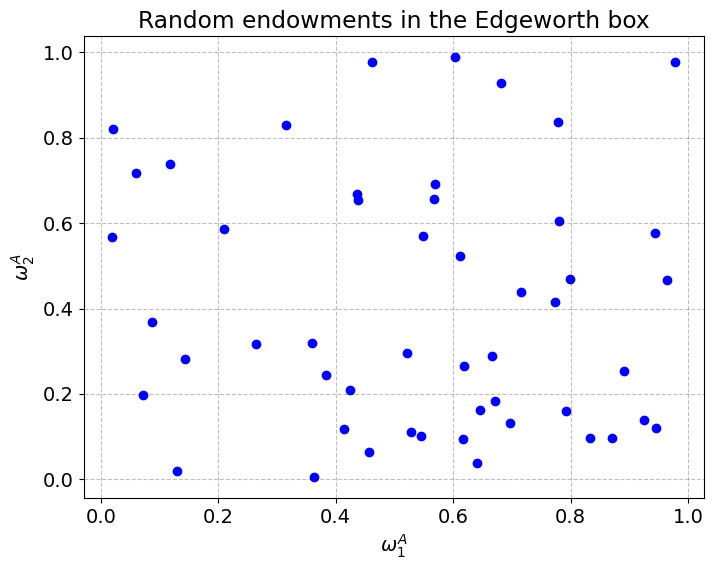

In [14]:
#We will generate the random set W with 50 elements for ω1A and ω2A
np.random.seed(0)  # For reproducibility
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

#We will plot the random set W in the ω1A-ω2A space
plt.figure(figsize=(8, 6))
plt.scatter(omega_1A_samples, omega_2A_samples, c='blue', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random endowments in the Edgeworth box')
plt.grid(True)
plt.show()


The plot displays the random endowments within the Edgeworth Box. These endowments represent the initial distribution of two goods in an exchange economy.

# Question 8

In question 8, we will calculate and plot the market equilibrium allocation for each initial endowment $(ωA)$ in the Edgeworth box.

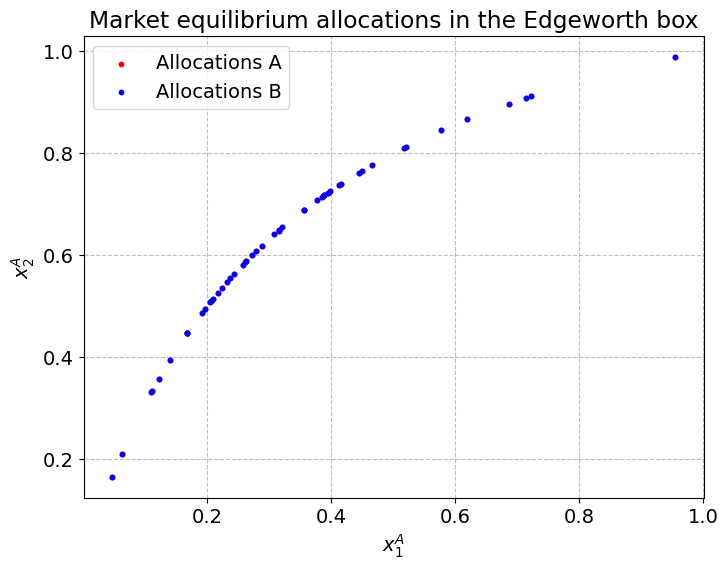

In [15]:
#We define the function to find market-clearing price for given ωA
def find_market_clearing_price(omega_A):
    #We assume excess demand function is defined
    initial_guess = 1.0
    market_clearing_price = fsolve(excess_demand_good1, initial_guess, args=(omega_A, 1 - omega_A, alpha, beta))
    return market_clearing_price[0]

#We prepare to collect allocations for plotting
allocations_A = []
allocations_B = []

#We calculate allocations for each ωA in W
for omega_1A, omega_2A in zip(omega_1A_samples, omega_2A_samples):
    omega_A = np.array([omega_1A, omega_2A])
    p1 = find_market_clearing_price(omega_A)
    allocation_A = demand_A(p1, omega_A=omega_A)
    allocation_B = demand_B(p1, omega_B=1 - omega_A)
    allocations_A.append(allocation_A)
    allocations_B.append(allocation_B)

#Lastly we plot in the Edgeworth Box
allocations_A = np.array(allocations_A)
allocations_B = np.array(allocations_B)

plt.figure(figsize=(8, 6))
plt.scatter(allocations_A[:, 0], allocations_A[:, 1], c='red', label='Allocations A', s=10)
plt.scatter(1 - allocations_B[:, 0], 1 - allocations_B[:, 1], c='blue', label='Allocations B', s=10)
plt.xlabel('$x_1^A$')

plt.ylabel('$x_2^A$')
plt.title('Market equilibrium allocations in the Edgeworth box')
plt.legend()
plt.grid(True)
plt.show()


The graph demonstrates how the market equilibrium allocations vary with different initial endowments. It highlights the contract curve, indicating the set of Pareto efficient allocations.